In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('population_2001-21.xlsx',sheet_name='Table 1',skiprows=6,header = 1)
df

,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,...,no..14,no..15,no..16,no..17,no..18,no..19,no..20,Unnamed: 31,no..21,%
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,New South Wales,1RNSW,Rest of NSW,101.0,Capital Region,10102.0,Queanbeyan,101021007.0,Braidwood,...,3849,3950.0,4041.0,4145.0,4222.0,4292.0,4360.0,NaN,68.0,1.6
2,1,New South Wales,1RNSW,Rest of NSW,101.0,Capital Region,10102.0,Queanbeyan,101021008.0,Karabar,...,8603,8531.0,8484.0,8424.0,8370.0,8371.0,8374.0,NaN,3.0,0.0
3,1,New South Wales,1RNSW,Rest of NSW,101.0,Capital Region,10102.0,Queanbeyan,101021009.0,Queanbeyan,...,11213,11230.0,11351.0,11441.0,11449.0,11449.0,11401.0,NaN,-48.0,-0.4
4,1,New South Wales,1RNSW,Rest of NSW,101.0,Capital Region,10102.0,Queanbeyan,101021010.0,Queanbeyan - East,...,4961,4970.0,5016.0,5077.0,5148.0,5082.0,5126.0,NaN,44.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2297,"Source: Regional population, 2020-21",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_vic = df.loc[df['S/T name'] == 'Victoria']
df_vic

,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,...,no..14,no..15,no..16,no..17,no..18,no..19,no..20,Unnamed: 31,no..21,%
577,2,Victoria,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011001.0,Alfredton,...,11039,11852.0,12522.0,13291.0,14071.0,15030.0,16263.0,NaN,1233.0,8.2
578,2,Victoria,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011002.0,Ballarat,...,12300,12301.0,12227.0,12175.0,12223.0,12097.0,11931.0,NaN,-166.0,-1.4
579,2,Victoria,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011003.0,Ballarat - North,...,23211,23539.0,23902.0,24147.0,24456.0,24606.0,24720.0,NaN,114.0,0.5
580,2,Victoria,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011004.0,Ballarat - South,...,24296,24654.0,25029.0,25390.0,25594.0,25639.0,25543.0,NaN,-96.0,-0.4
581,2,Victoria,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011005.0,Buninyong,...,7191,7311.0,7491.0,7584.0,7713.0,7721.0,7668.0,NaN,-53.0,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2,Victoria,2RVIC,Rest of Vic.,217.0,Warrnambool and South West,21703.0,Colac - Corangamite,217031476.0,Otway,...,3538,3556.0,3569.0,3579.0,3607.0,3653.0,3661.0,NaN,8.0,0.2
1035,2,Victoria,2RVIC,Rest of Vic.,217.0,Warrnambool and South West,21704.0,Warrnambool,217041477.0,Moyne - East,...,6716,6709.0,6667.0,6669.0,6685.0,6737.0,6815.0,NaN,78.0,1.2
1036,2,Victoria,2RVIC,Rest of Vic.,217.0,Warrnambool and South West,21704.0,Warrnambool,217041478.0,Moyne - West,...,9467,9603.0,9680.0,9776.0,9840.0,9857.0,9977.0,NaN,120.0,1.2
1037,2,Victoria,2RVIC,Rest of Vic.,217.0,Warrnambool and South West,21704.0,Warrnambool,217041479.0,Warrnambool - North,...,21217,21442.0,21693.0,21976.0,22229.0,22487.0,22586.0,NaN,99.0,0.4


In [4]:
df_vic.columns

Index(['S/T code', 'S/T name', 'GCCSA code', 'GCCSA name', 'SA4 code',
       'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code', 'SA2 name', 'no.',
       'no..1', 'no..2', 'no..3', 'no..4', 'no..5', 'no..6', 'no..7', 'no..8',
       'no..9', 'no..10', 'no..11', 'no..12', 'no..13', 'no..14', 'no..15',
       'no..16', 'no..17', 'no..18', 'no..19', 'no..20', 'Unnamed: 31',
       'no..21', '%'],
      dtype='object')

In [5]:
df_vic = df_vic.rename(columns = {'no.':'2001','no..1':'2002','no..2':'2003','no..3':'2004','no..4':'2005',
                     'no..5':'2006','no..6':'2007','no..7':'2008','no..8':'2009','no..9':'2010',
                     'no..10':'2011','no..11':'2012','no..12':'2013','no..13':'2014','no..14':'2015',
                     'no..15':'2016','no..16':'2017','no..17':'2018','no..18':'2019',
                     'no..19':'2020','no..20':'2021','no..21':'2021-2020='}, inplace = False)

In [6]:
df_vic.columns

Index(['S/T code', 'S/T name', 'GCCSA code', 'GCCSA name', 'SA4 code',
       'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code', 'SA2 name', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', 'Unnamed: 31', '2021-2020=', '%'],
      dtype='object')

In [7]:
df_VIC = df_vic.drop(columns=['GCCSA code', 'GCCSA name', 'SA4 code',
       'SA4 name', 'SA3 code', 'SA3 name','Unnamed: 31'])
df_VIC

,S/T code,S/T name,SA2 code,SA2 name,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2021-2020=,%
577,2,Victoria,201011001.0,Alfredton,5756,6092,6293,6480,6648,6761,...,10338,11039,11852.0,12522.0,13291.0,14071.0,15030.0,16263.0,1233.0,8.2
578,2,Victoria,201011002.0,Ballarat,11497,11708,12015,12189,12269,12356,...,12327,12300,12301.0,12227.0,12175.0,12223.0,12097.0,11931.0,-166.0,-1.4
579,2,Victoria,201011003.0,Ballarat - North,20268,20586,20838,21000,21134,21279,...,23000,23211,23539.0,23902.0,24147.0,24456.0,24606.0,24720.0,114.0,0.5
580,2,Victoria,201011004.0,Ballarat - South,20424,20389,20407,20314,20423,20534,...,24049,24296,24654.0,25029.0,25390.0,25594.0,25639.0,25543.0,-96.0,-0.4
581,2,Victoria,201011005.0,Buninyong,5320,5399,5557,5620,5857,6037,...,7082,7191,7311.0,7491.0,7584.0,7713.0,7721.0,7668.0,-53.0,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2,Victoria,217031476.0,Otway,3452,3479,3511,3511,3492,3459,...,3519,3538,3556.0,3569.0,3579.0,3607.0,3653.0,3661.0,8.0,0.2
1035,2,Victoria,217041477.0,Moyne - East,6718,6704,6676,6643,6638,6652,...,6734,6716,6709.0,6667.0,6669.0,6685.0,6737.0,6815.0,78.0,1.2
1036,2,Victoria,217041478.0,Moyne - West,8317,8387,8450,8487,8517,8601,...,9383,9467,9603.0,9680.0,9776.0,9840.0,9857.0,9977.0,120.0,1.2
1037,2,Victoria,217041479.0,Warrnambool - North,17053,17449,17726,17937,18172,18528,...,20930,21217,21442.0,21693.0,21976.0,22229.0,22487.0,22586.0,99.0,0.4


In [8]:
df_VIC[['SA2 code','SA2 name','2001','2011','2021', '2021-2020=', '%']].sort_values('%',ascending=False).head(10)

,SA2 code,SA2 name,2001,2011,2021,2021-2020=,%
957,213041359.0,Rockbank - Mount Cottrell,1760,2772,15274.0,3904.0,34.3
841,210051445.0,Mickleham - Yuroke,873,1579,19029.0,4127.0,27.7
810,209041437.0,Wollert,389,528,22785.0,3449.0,17.8
707,206051131.0,Port Melbourne Industrial,9,15,800.0,115.0,16.8
900,212031303.0,Cranbourne South,4798,6880,15752.0,1890.0,13.6
973,213051468.0,Werribee - West,10547,11214,20663.0,2071.0,11.1
898,212031301.0,Cranbourne East,1123,8344,60489.0,5027.0,9.1
802,209041225.0,Whittlesea,5781,7580,9904.0,797.0,8.8
582,201011006.0,Delacombe,4154,5838,10007.0,773.0,8.4
577,201011001.0,Alfredton,5756,8452,16263.0,1233.0,8.2


In [11]:
predict = ['p2012','p2013','p2014','p2015','p2016','p2017','p2018','p2019','p2020','p2021']

In [43]:
YEAR_LIST = ['2001','2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021']
predict_df = pd.DataFrame()
i = 0
while i<19:
    #print(i)
    predict_df[YEAR_LIST[i+2]] = df_vic[YEAR_LIST[i+1]]*(1+(df_vic[YEAR_LIST[i+1]] - df_vic[YEAR_LIST[i]])/(df_vic[YEAR_LIST[i]]+0.1))
    i=i+1
          
predict_df    
    #df_VIC[year] = round(df_vic['2012']*(1+(df_vic['2012'] - df_vic['2011'])/df_vic['2011']))

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
577,6447.607443,6500.628404,6672.553749,6820.352896,6875.918999,7318.019168,7518.049388,7972.079234,8184.293009,9049.435553,9711.729156,10415.201532,11002.077166,11787.526228,12724.867897,13229.869491,14107.219244,14896.769124,16054.352751
578,11922.870533,12330.047275,12365.518381,12349.524403,12443.616207,12460.218418,12552.417211,12472.001314,12448.015822,12268.755788,12349.005241,12347.002064,12302.050801,12273.059357,12302.000073,12153.445765,12123.221573,12271.188844,11972.299883
579,20908.987749,21093.083576,21163.258646,21268.854405,21424.994152,21707.131091,21982.768999,22139.85778,22496.521714,22634.965334,22801.575323,23104.653469,23143.89402,23423.93477,23871.633611,24270.596335,24394.510261,24768.952860,24756.919403
580,20354.06015,20425.015803,20221.424279,20532.584328,20645.602744,21294.919772,22043.940634,22420.286538,23416.0201,23732.250731,23693.672178,23952.751059,24407.257139,24545.535825,25017.273612,25409.702398,25756.205337,25799.638261,25684.078944
581,5479.171613,5719.620807,5683.713088,6103.990089,6222.528675,6226.46206,6375.386016,6615.121975,6763.179627,6857.560537,6985.472543,7116.463781,7181.37372,7301.676071,7433.000807,7675.429156,7678.153329,7844.192495,7729.008194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,3506.210394,3543.293409,3511.0,3473.103358,3426.312792,3519.259316,3513.040927,3479.034875,3430.258732,3380.46357,3492.377884,3538.4852,3541.137771,3557.102043,3574.091066,3582.047158,3589.027738,3635.218267,3699.585346
1035,6690.029383,6648.117361,6610.163613,6633.003839,6666.029316,6560.318787,6656.094231,6775.780685,6775.192806,6819.236827,6749.033412,6734.033486,6719.03356,6698.048381,6702.0074,6625.263552,6671.000570,6701.038146,6789.403704
1036,8457.588306,8513.472476,8524.161572,8547.10569,8685.827465,8788.004488,8891.10353,8964.840232,9052.851567,9083.387625,9312.264459,9434.928167,9466.739852,9551.751095,9740.952277,9757.616603,9872.951065,9904.418326,9874.029197
1037,17854.193425,18007.395717,18150.510417,18410.077504,18890.972249,19232.571969,19339.801119,19634.59122,19902.624252,20127.055933,20634.034453,20977.361747,21252.904508,21507.934061,21669.384987,21946.937021,22262.690607,22484.911513,22747.993293


In [10]:
growth_df = pd.DataFrame()
i = 0
while i<20:
    growth_df[YEAR_LIST[i+1]] = df_vic[YEAR_LIST[i+1]]-df_vic[YEAR_LIST[i]]
    i+=1
growth_df

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
577,336,201,187,168,113,273,238,342,280,558,608,654,624,701,813.0,670.0,769.0,780.0,959.0,1233.0
578,211,307,174,80,87,52,72,-4,-14,-97,-8,-5,-25,-27,1.0,-74.0,-52.0,48.0,-126.0,-166.0
579,318,252,162,134,145,213,244,201,278,209,188,245,143,211,328.0,363.0,245.0,309.0,150.0,114.0
580,-35,18,-93,109,111,377,559,470,726,527,249,254,353,247,358.0,375.0,361.0,204.0,45.0,-96.0
581,79,158,63,237,180,94,121,179,164,130,129,130,98,109,120.0,180.0,93.0,129.0,8.0,-53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,27,32,0,-19,-33,30,12,-11,-30,-40,36,41,22,19,18.0,13.0,10.0,28.0,46.0,8.0
1035,-14,-28,-33,-5,14,-46,25,72,36,40,-15,-15,-15,-18,-7.0,-42.0,2.0,16.0,52.0,78.0
1036,70,63,37,30,84,93,98,86,87,59,143,133,83,84,136.0,77.0,96.0,64.0,17.0,120.0
1037,396,277,211,235,356,349,230,262,265,245,374,359,318,287,225.0,251.0,283.0,253.0,258.0,99.0


In [12]:
growth_rate_df = pd.DataFrame()
i = 0
while i<20:
    growth_rate_df[YEAR_LIST[i+1]] = (df_vic[YEAR_LIST[i+1]]-df_vic[YEAR_LIST[i]])/(df_vic[YEAR_LIST[i]]+0.01)
    i+=1
growth_rate_df

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
577,0.058374,0.032994,0.029716,0.025926,0.016998,0.040379,0.033836,0.04703,0.036774,0.070687,0.071936,0.072185,0.064237,0.067808,0.073648,0.056530,0.061412,0.058686,0.068154,0.082036
578,0.018353,0.026221,0.014482,0.006563,0.007091,0.004208,0.005803,-0.000321,-0.001122,-0.007784,-0.000647,-0.000405,-0.002024,-0.00219,0.000081,-0.006016,-0.004253,0.003943,-0.010308,-0.013722
579,0.01569,0.012241,0.007774,0.006381,0.006861,0.01001,0.011353,0.009247,0.012673,0.009408,0.008384,0.010835,0.006256,0.009174,0.014131,0.015421,0.010250,0.012797,0.006133,0.004633
580,-0.001714,0.000883,-0.004557,0.005366,0.005435,0.01836,0.026732,0.021891,0.03309,0.023251,0.010736,0.010835,0.014897,0.010271,0.014735,0.015211,0.014423,0.008035,0.001758,-0.003744
581,0.01485,0.029265,0.011337,0.042171,0.030732,0.015571,0.019736,0.028631,0.025501,0.019712,0.019182,0.018967,0.014032,0.015391,0.016688,0.024620,0.012415,0.017009,0.001037,-0.006864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0.007822,0.009198,0.0,-0.005412,-0.00945,0.008673,0.003439,-0.003142,-0.008596,-0.011561,0.010526,0.011863,0.006291,0.005399,0.005088,0.003656,0.002802,0.007823,0.012753,0.002190
1035,-0.002084,-0.004177,-0.004943,-0.000753,0.002109,-0.006915,0.003784,0.010858,0.005371,0.005936,-0.002213,-0.002218,-0.002223,-0.002673,-0.001042,-0.006260,0.000300,0.002399,0.007779,0.011578
1036,0.008416,0.007512,0.004379,0.003535,0.009863,0.010813,0.011272,0.009782,0.009799,0.006581,0.015847,0.014509,0.008925,0.008952,0.014366,0.008018,0.009917,0.006547,0.001728,0.012174
1037,0.023222,0.015875,0.011903,0.013101,0.019591,0.018836,0.012184,0.013712,0.013682,0.012478,0.018814,0.017726,0.015428,0.013712,0.010605,0.011706,0.013046,0.011513,0.011606,0.004403


In [14]:
df_VIC[['2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020']].values[1]

array([11497, 11708, 12015, 12189, 12269, 12356, 12408, 12480, 12476,
       12462, 12365, 12357, 12352, 12327, 12300, 12301.0, 12227.0,
       12175.0, 12223.0, 12097.0], dtype=object)

In [16]:
df_VIC['2021'].values[1].reshape(-1,1)

array([[11931.]])

In [17]:
df_VIC.columns

Index(['S/T code', 'S/T name', 'SA2 code', 'SA2 name', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2021-2020=', '%'],
      dtype='object')

In [18]:
bd = df_VIC.loc[df['SA2 code'] ==201011001]
bd = bd[['2001','2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020','2021']].T
bd=bd.reset_index().rename(columns={643:'population','index':'year'})
bd


,year,577
0,2001,5756
1,2002,6092
2,2003,6293
3,2004,6480
4,2005,6648
5,2006,6761
6,2007,7034
7,2008,7272
8,2009,7614
9,2010,7894


In [19]:
x = bd.iloc[:, 0].values.reshape(-1, 1)
y = bd.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2020]])
y_pred

array([[14018.68051948]])

In [20]:
predict_df['2020']

577     14896.769124
578     12271.188844
579     24768.952860
580     25799.638261
581      7844.192495
            ...     
1034     3635.218267
1035     6701.038146
1036     9904.418326
1037    22484.911513
1038    13345.203820
Name: 2020, Length: 462, dtype: float64

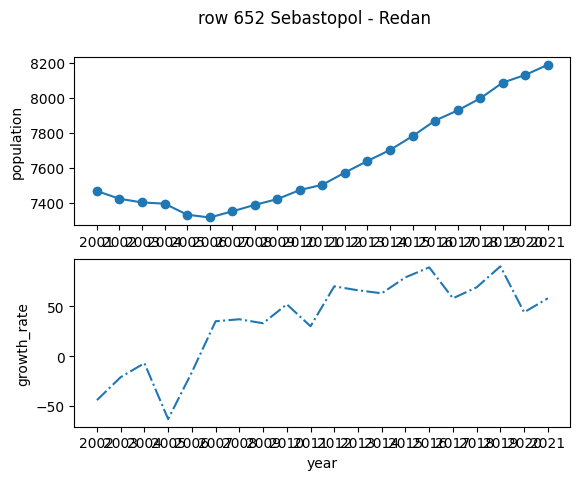

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('row 652 Sebastopol - Redan')

ax1.plot(df_VIC.iloc[9,4:25], 'o-')
ax1.set_ylabel('population')

ax2.plot(growth_df.iloc[9,:] ,'-.')
ax2.set_xlabel('year')
ax2.set_ylabel('growth_rate')

plt.show()

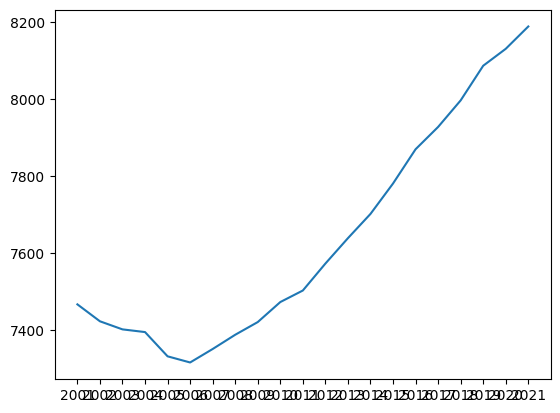

In [22]:
plt.plot(df_VIC.iloc[9,4:25])

<Figure size 2000x300 with 0 Axes>

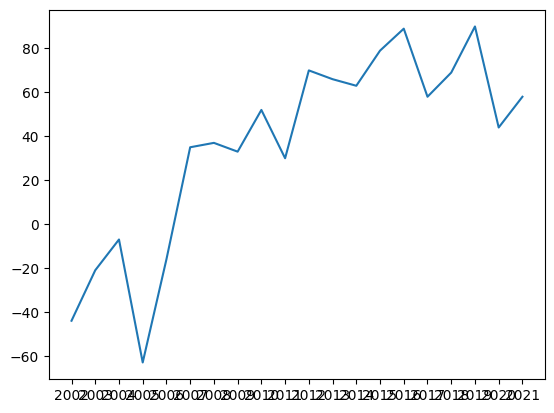

<Figure size 2000x300 with 0 Axes>

In [23]:
plt.plot(growth_df.iloc[9,:])
figure(figsize=(40,6), dpi=50)

In [24]:
true_df = df_vic[['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021']]

In [25]:
df_2003_2021_error = predict_df - true_df

In [26]:
true_df[true_df.isna().any(axis=1)]

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


In [27]:
predict_df[predict_df.isna().any(axis=1)]

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


In [28]:
true_df[predict_df.isna().any(axis=1)]

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


In [29]:
df_vic.loc[728]

S/T code                            2
S/T name                     Victoria
GCCSA code                      2GMEL
GCCSA name          Greater Melbourne
SA4 code                        207.0
SA4 name       Melbourne - Inner East
SA3 code                      20701.0
SA3 name                   Boroondara
SA2 code                  207011152.0
SA2 name                Hawthorn East
2001                            12912
2002                            13172
2003                            13343
2004                            13423
2005                            13505
2006                            13626
2007                            13835
2008                            14022
2009                            14241
2010                            14369
2011                            14417
2012                            14531
2013                            14732
2014                            15066
2015                            15601
2016                          16192.0
2017        

In [30]:
predict_df_imputed = predict_df.fillna(0)

In [31]:
mean_squared_error(true_df['2021'],predict_df_imputed['2021'])

388636.448107777

In [32]:
true_df

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
577,6293,6480,6648,6761,7034,7272,7614,7894,8452,9060,9714,10338,11039,11852.0,12522.0,13291.0,14071.0,15030.0,16263.0
578,12015,12189,12269,12356,12408,12480,12476,12462,12365,12357,12352,12327,12300,12301.0,12227.0,12175.0,12223.0,12097.0,11931.0
579,20838,21000,21134,21279,21492,21736,21937,22215,22424,22612,22857,23000,23211,23539.0,23902.0,24147.0,24456.0,24606.0,24720.0
580,20407,20314,20423,20534,20911,21470,21940,22666,23193,23442,23696,24049,24296,24654.0,25029.0,25390.0,25594.0,25639.0,25543.0
581,5557,5620,5857,6037,6131,6252,6431,6595,6725,6854,6984,7082,7191,7311.0,7491.0,7584.0,7713.0,7721.0,7668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,3511,3511,3492,3459,3489,3501,3490,3460,3420,3456,3497,3519,3538,3556.0,3569.0,3579.0,3607.0,3653.0,3661.0
1035,6676,6643,6638,6652,6606,6631,6703,6739,6779,6764,6749,6734,6716,6709.0,6667.0,6669.0,6685.0,6737.0,6815.0
1036,8450,8487,8517,8601,8694,8792,8878,8965,9024,9167,9300,9383,9467,9603.0,9680.0,9776.0,9840.0,9857.0,9977.0
1037,17726,17937,18172,18528,18877,19107,19369,19634,19879,20253,20612,20930,21217,21442.0,21693.0,21976.0,22229.0,22487.0,22586.0


In [33]:
predict_df_imputed

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
577,6447.607443,6500.628404,6672.553749,6820.352896,6875.918999,7318.019168,7518.049388,7972.079234,8184.293009,9049.435553,9711.729156,10415.201532,11002.077166,11787.526228,12724.867897,13229.869491,14107.219244,14896.769124,16054.352751
578,11922.870533,12330.047275,12365.518381,12349.524403,12443.616207,12460.218418,12552.417211,12472.001314,12448.015822,12268.755788,12349.005241,12347.002064,12302.050801,12273.059357,12302.000073,12153.445765,12123.221573,12271.188844,11972.299883
579,20908.987749,21093.083576,21163.258646,21268.854405,21424.994152,21707.131091,21982.768999,22139.857780,22496.521714,22634.965334,22801.575323,23104.653469,23143.894020,23423.934770,23871.633611,24270.596335,24394.510261,24768.952860,24756.919403
580,20354.060150,20425.015803,20221.424279,20532.584328,20645.602744,21294.919772,22043.940634,22420.286538,23416.020100,23732.250731,23693.672178,23952.751059,24407.257139,24545.535825,25017.273612,25409.702398,25756.205337,25799.638261,25684.078944
581,5479.171613,5719.620807,5683.713088,6103.990089,6222.528675,6226.462060,6375.386016,6615.121975,6763.179627,6857.560537,6985.472543,7116.463781,7181.373720,7301.676071,7433.000807,7675.429156,7678.153329,7844.192495,7729.008194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,3506.210394,3543.293409,3511.000000,3473.103358,3426.312792,3519.259316,3513.040927,3479.034875,3430.258732,3380.463570,3492.377884,3538.485200,3541.137771,3557.102043,3574.091066,3582.047158,3589.027738,3635.218267,3699.585346
1035,6690.029383,6648.117361,6610.163613,6633.003839,6666.029316,6560.318787,6656.094231,6775.780685,6775.192806,6819.236827,6749.033412,6734.033486,6719.033560,6698.048381,6702.007400,6625.263552,6671.000570,6701.038146,6789.403704
1036,8457.588306,8513.472476,8524.161572,8547.105690,8685.827465,8788.004488,8891.103530,8964.840232,9052.851567,9083.387625,9312.264459,9434.928167,9466.739852,9551.751095,9740.952277,9757.616603,9872.951065,9904.418326,9874.029197
1037,17854.193425,18007.395717,18150.510417,18410.077504,18890.972249,19232.571969,19339.801119,19634.591220,19902.624252,20127.055933,20634.034453,20977.361747,21252.904508,21507.934061,21669.384987,21946.937021,22262.690607,22484.911513,22747.993293


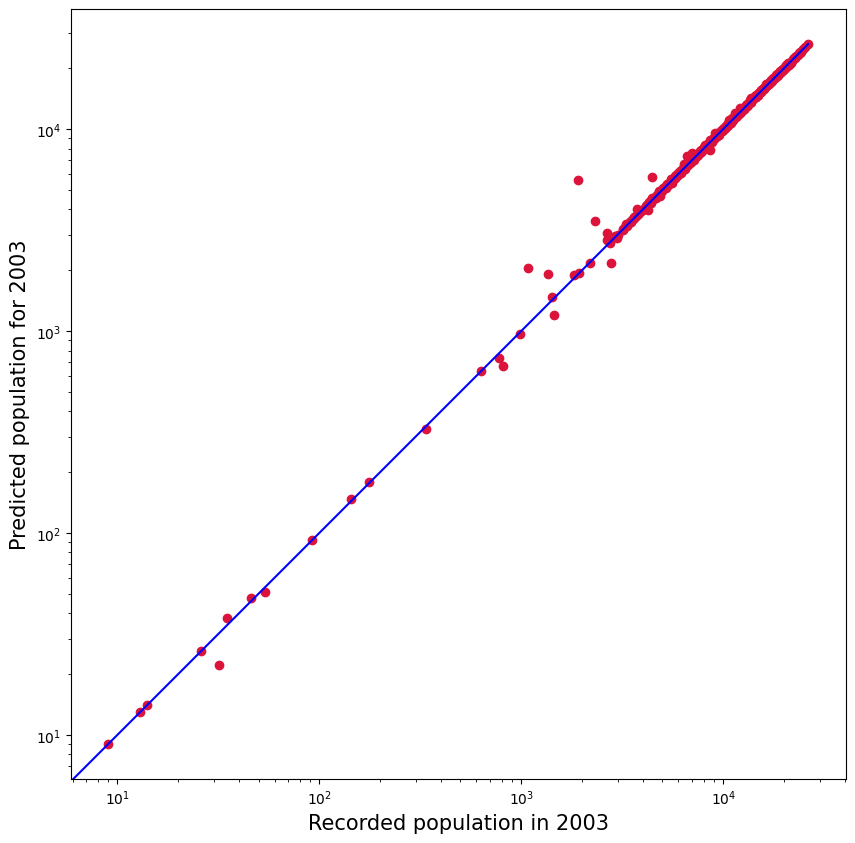

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(true_df['2003'], predict_df_imputed['2003'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict_df_imputed['2003']), max(true_df['2003']))
p2 = min(min(predict_df_imputed['2003']), min(true_df['2003']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('')
plt.xlabel('Recorded population in 2003', fontsize=15)
plt.ylabel('Predicted population for 2003', fontsize=15)
plt.axis('equal')
plt.show()

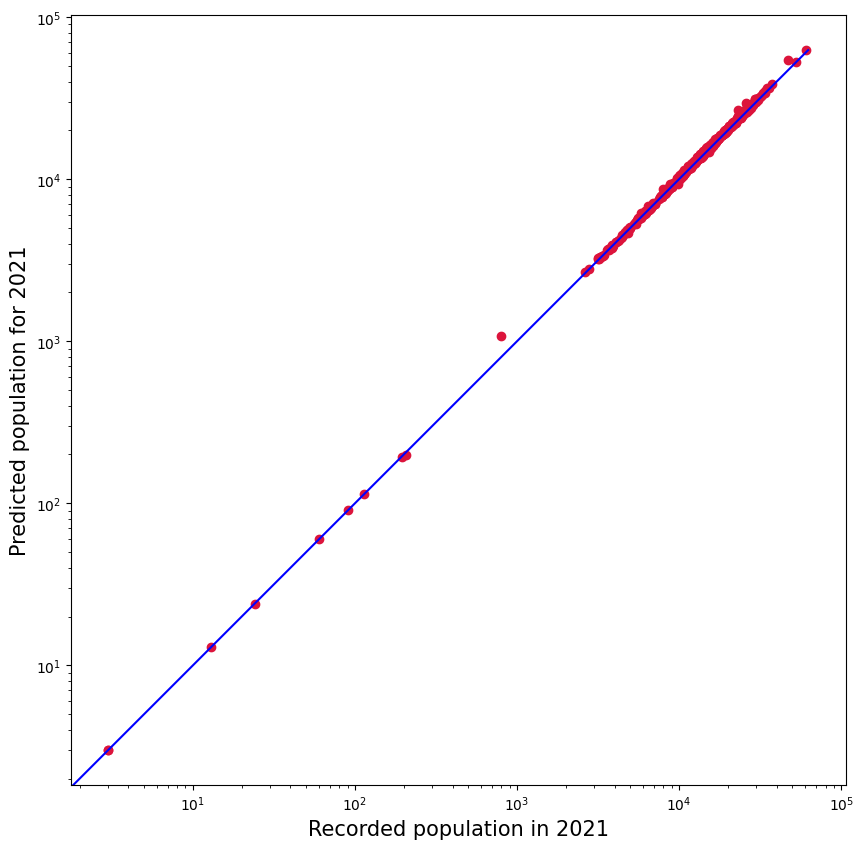

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(true_df['2021'], predict_df_imputed['2021'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict_df_imputed['2021']), max(true_df['2021']))
p2 = min(min(predict_df_imputed['2021']), min(true_df['2021']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('')
plt.xlabel('Recorded population in 2021', fontsize=15)
plt.ylabel('Predicted population for 2021', fontsize=15)
plt.axis('equal')
plt.show()

In [45]:
df_vic['p2013'] = df_vic['2012']*(1+(df_vic['2012'] - df_vic['2011'])/(df_vic['2011']+0.01))
df_vic['p2022'] = df_vic['2021']*(1+(df_vic['2021'] - df_vic['2020'])/(df_vic['2020']+0.01))
df_vic['p2023'] = df_vic['p2022']*(1+(df_vic['p2022'] - df_vic['2021'])/(df_vic['2021']+0.01))
df_vic['p2024'] = df_vic['p2023']*(1+(df_vic['p2023'] - df_vic['p2022'])/(df_vic['p2022']+0.01))

In [51]:
df_vic.to_csv('population_prediction.csv')

https://pages.uoregon.edu/rgp/PPPM613/class8a.htm

The annual growth of a population may be shown by the equation: I = rN (K-N / K), where I = the annual increase for the population, r = the annual growth rate, N = the population size, and K = the carrying capacity.